In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk

In [2]:
tweets = pd.read_csv("Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
mood_count = tweets['airline_sentiment'].value_counts()
mood_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [4]:
flight_count = tweets['airline'].value_counts()
flight_count

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

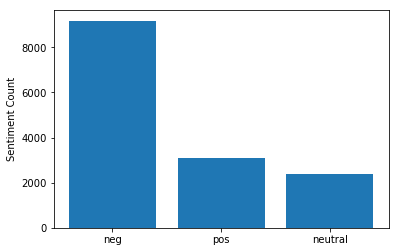

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

Index = [1,2,3]
plt.bar(Index, mood_count)
plt.xticks(Index, ['neg', 'pos', 'neutral'])
plt.ylabel('Sentiment Count')
plt.show()

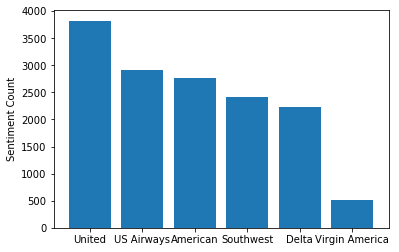

In [6]:
Index = [1,2,3,4,5,6]
plt.bar(Index, flight_count)
plt.xticks(Index, ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America'])
plt.ylabel('Sentiment Count')
plt.show()

In [7]:
united_flight_data = tweets[tweets['airline'] == 'United']
united_flight_data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
504,570307876897628160,positive,1.0000,NaN,NaN,United,NaN,rdowning76,NaN,0,@united thanks,NaN,2015-02-24 11:42:48 -0800,usa,NaN
505,570307847281614848,positive,1.0000,NaN,NaN,United,NaN,CoreyAStewart,NaN,0,@united Thanks for taking care of that MR!! Ha...,NaN,2015-02-24 11:42:41 -0800,"Richmond, VA",Eastern Time (US & Canada)
506,570307109704900608,negative,1.0000,Cancelled Flight,0.7030,United,NaN,CoralReefer420,NaN,0,@united still no refund or word via DM. Please...,NaN,2015-02-24 11:39:45 -0800,"Bay Area, California",Alaska
507,570307026263384064,negative,1.0000,Late Flight,1.0000,United,NaN,lsalazarll,NaN,0,@united Delayed due to lack of crew and now de...,NaN,2015-02-24 11:39:25 -0800,NaN,Mountain Time (US & Canada)
508,570306733010264064,positive,0.3441,NaN,0.0000,United,NaN,rombaa,NaN,0,@united thanks -- we filled it out. How's our ...,NaN,2015-02-24 11:38:15 -0800,NaN,NaN
509,570306217001799680,negative,0.3475,Can't Tell,0.3475,United,NaN,samidip,NaN,0,@united Your ERI-ORD express connections are h...,NaN,2015-02-24 11:36:12 -0800,"Erie, PA",Eastern Time (US & Canada)
510,570305603056349184,neutral,0.6450,NaN,0.0000,United,NaN,karenmcgregor86,NaN,0,@united even on international flight Glasgow t...,NaN,2015-02-24 11:33:46 -0800,"Kilmarnock, now Edinburgh.",Edinburgh
511,570304912468402177,negative,0.6667,Can't Tell,0.3333,United,NaN,andycheco,NaN,0,@united you think you boarded flight AU1066 to...,"[19.43706642, -99.07927123]",2015-02-24 11:31:01 -0800,New York,Eastern Time (US & Canada)
512,570302375510056960,neutral,0.6761,NaN,0.0000,United,NaN,hmansfield,NaN,0,"@united I understand, but it's tough when ther...",NaN,2015-02-24 11:20:56 -0800,"Berkeley Heights, NJ",Quito
513,570302023993831425,negative,0.6735,Bad Flight,0.3476,United,NaN,slandail,NaN,0,@united Gate agent hooked me up with alternate...,NaN,2015-02-24 11:19:32 -0800,"Columbus, Ohio",Eastern Time (US & Canada)


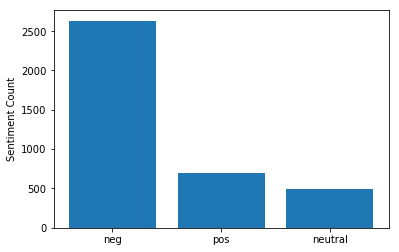

In [8]:
united_mood_count = united_flight_data['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index, united_mood_count)
plt.xticks(Index, ['neg', 'pos', 'neutral'])
plt.ylabel('Sentiment Count')
plt.show()

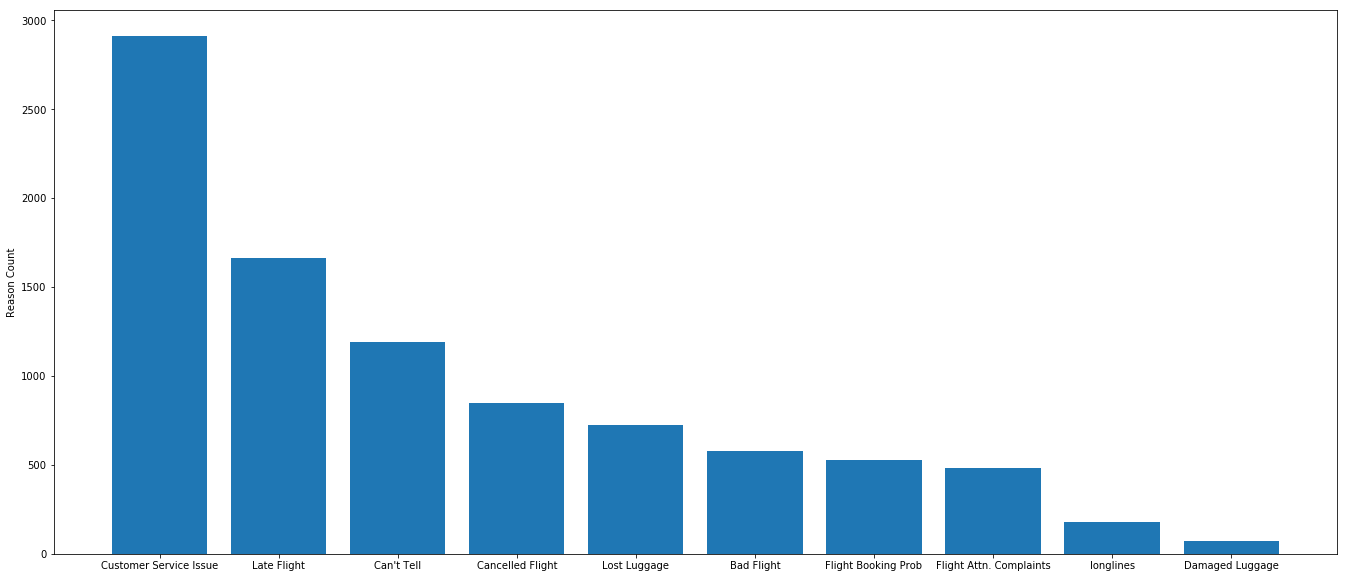

In [9]:
negativereason_count = tweets['negativereason'].value_counts()
Index = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (23,10))
plt.bar(Index, negativereason_count)
plt.xticks(Index, ['Customer Service Issue', 'Late Flight', "Can't Tell", "Cancelled Flight", "Lost Luggage", "Bad Flight", "Flight Booking Prob", "Flight Attn. Complaints", "longlines", "Damaged Luggage"])
plt.ylabel('Reason Count')
plt.show()

In [10]:
    # out of 14640 datas, 5462 are null values
pd.isnull(tweets['negativereason']).sum()

5462

In [11]:
negativereason_count.sum()

9178

In [12]:
from wordcloud import WordCloud, STOPWORDS

df = tweets[tweets['airline_sentiment'] == 'negative']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


In [13]:
words = ' '.join(df['text'])

In [14]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', height = 2500, width = 3000).generate(words)

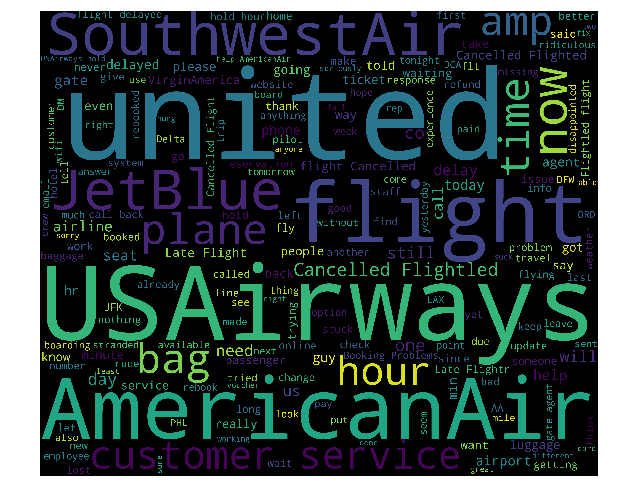

In [15]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Multinomial NaiveBayes

    # P(xi/c1) = ( n(xi belongs to c1) + 1 )/( TN(belongs to c1) + n(V) )

In [3]:
    # shuffling the dataframe
tweets = tweets.sample(frac=1).reset_index(drop=True)

In [4]:
data = tweets['text']
tweets['sentiment'] = tweets['airline_sentiment'].apply(lambda x: 0 if x == 'negative' else 1)
target = tweets['sentiment']

In [10]:
stops = set(stopwords.words('english'))
stops.update(":", ".", "!", "?", '"', "'", "-", "(", ")", ",", "$", "@", ";", "#", "&", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9")
import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
lemmatizer = WordNetLemmatizer()

def clean_data(data):
    meaningful_words = []
    
    # for removing unicode and urls from the text
    for w in data:
        try:
            if "/" in w:
                data.remove(w)
            if "http" in w:
                data.remove(w)
            if "'" in w:
                data.remove(w)
        except UnicodeEncodeError:
            data.remove(w)
                    
    for w in data:
        
        if w.lower() not in stops:
            pos = pos_tag([w])
            n_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            meaningful_words.append(n_word.lower())
            
    return (" ".join(meaningful_words))

clean_text = []
for i in range(data.size):
    temp_data = emoji_pattern.sub(r'', data[i])
    clean_text.append(clean_data(word_tokenize(temp_data)))

In [11]:
clean_text

['united `` left gate minute early thought `` count sit tarmac half hour comeonpeople',
 'southwestair get gin amp tonic',
 'united thanks update',
 'americanair best agent could put flight arrive tomorrow afternoon six hour layover',
 'southwestair sleep floor like homeless delayed flight equipment work job get2',
 'usairways extreme inconvenience make ppl check bag lot overhead space left lie fault',
 'americanair thank see',
 'united thanks',
 'southwestair yeah rebooked tomorrow hoping 3rd time charm cancelled flightled flight',
 'jetblue closepwcs please tweet this❤️ fly jetblue every time btw',
 'usairways hello four hours since plane land flt 630 phx jfk hr tarmac wait gate plus hour bag yet',
 'united still wait reply',
 'southwestair freeze plane',
 'united deny get plane get chance prove fit rookie read bio',
 'virginamerica lt pretty graphic much well minimal iconography',
 'southwestair flight cancelled flightled monday look cancelled flight credit card',
 'usairways issue 

In [12]:
clean_text = pd.Series(clean_text)

In [13]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(clean_text, target, test_size = 0.2, random_state = 42)
count_vec = CountVectorizer(analyzer = "word", max_features = 4500, ngram_range = (1, 4))

train_transformed = count_vec.fit_transform(x_train)
test_transformed = count_vec.transform(x_test)

C:\Users\dhruv\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_transformed, y_train)
clf.score(test_transformed, y_test)

0.81693989071038253

    # Read about Tfidf

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vec1 = TfidfVectorizer(analyzer = "word", max_features = 4500, ngram_range = (1, 4))
train_transformed1 = count_vec1.fit_transform(x_train)
test_transformed1 = count_vec1.transform(x_test)
clf1 = MultinomialNB()
clf1.fit(train_transformed1, y_train)
clf1.score(test_transformed1, y_test)

0.80327868852459017